# Ford GoBike System Data Exploration (2018.01-2018.11)
## by Kevin Wong

## Preliminary Wrangling

This document explores a dataset containing datetime, locations and other information of a bike-sharing system for approximately 519,699 trips' records in 2017.

In [140]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

The dataset includes the trip data from Jan 2018 to Nov 2018. The reason of choosing these data are: (1) The data of Dec 2018 is not avaliable, so cannot include it. (2) The dataset of 2017 missed records from Jan 2017 to May 2017.

In [141]:
# Load all data by month
trip_201801 = pd.read_csv('dataset/201801-fordgobike-tripdata.csv')
trip_201802 = pd.read_csv('dataset/201802-fordgobike-tripdata.csv')
trip_201803 = pd.read_csv('dataset/201803-fordgobike-tripdata.csv')
trip_201804 = pd.read_csv('dataset/201804-fordgobike-tripdata.csv')
trip_201805 = pd.read_csv('dataset/201805-fordgobike-tripdata.csv')
trip_201806 = pd.read_csv('dataset/201806-fordgobike-tripdata.csv')
trip_201807 = pd.read_csv('dataset/201807-fordgobike-tripdata.csv')
trip_201808 = pd.read_csv('dataset/201808-fordgobike-tripdata.csv')
trip_201809 = pd.read_csv('dataset/201809-fordgobike-tripdata.csv')
trip_201810 = pd.read_csv('dataset/201810-fordgobike-tripdata.csv')
trip_201811 = pd.read_csv('dataset/201811-fordgobike-tripdata.csv')
trip_list=[trip_201801,trip_201802,trip_201803,trip_201804,trip_201805,trip_201806,trip_201807,trip_201808,
          trip_201809,trip_201810, trip_201811]
# Concatenate above data
trips = pd.concat(trip_list, ignore_index=True)

In [142]:
trips.info()
trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732358 entries, 0 to 1732357
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 211.5+ MB


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [143]:
trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.732358e+06,1.720779e+06,1.732358e+06,1.732358e+06,1.720779e+06,1.732358e+06,1.732358e+06,1.732358e+06,1.626651e+06
mean,8.638714e+02,1.187221e+02,3.776686e+01,-1.223491e+02,1.172679e+02,3.776698e+01,-1.223486e+02,2.230304e+03,1.983042e+03
std,2.410764e+03,9.958724e+01,1.056814e-01,1.681671e-01,9.965282e+01,1.055627e-01,1.677678e-01,1.225680e+03,1.043766e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.510000e+02,3.100000e+01,3.777106e+01,-1.224113e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.201000e+03,1.978000e+03
50%,5.570000e+02,8.800000e+01,3.778107e+01,-1.223974e+02,8.700000e+01,3.778127e+01,-1.223971e+02,2.293000e+03,1.985000e+03
75%,8.740000e+02,1.830000e+02,3.779625e+01,-1.222856e+02,1.830000e+02,3.779728e+01,-1.222887e+02,3.255000e+03,1.990000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,4.466000e+03,2.000000e+03


In [144]:
trips.member_gender.value_counts()

Male      1193210
Female     408762
Other       25030
Name: member_gender, dtype: int64

#### Clean Data

In [145]:
trips_clean = trips.copy()

In [146]:
# Convert the start_time and end_time to datetime type
trips_clean['start_time'] = pd.to_datetime(trips_clean['start_time'])
trips_clean['end_time'] = pd.to_datetime(trips_clean['end_time'])

In [147]:
# Conver the user_type to categorical data type
trips_clean['user_type'] = trips_clean['user_type'].astype('category')
# Convert the member_gender to categorical data type
trips_clean['member_gender'] = trips_clean['member_gender'].astype('category')

In [148]:
# Convert the id columns (bike_id, start_station_id, end_station_id) to string
trips_clean['bike_id'] = trips_clean['bike_id'].apply(lambda x: '{:.0f}'.format(x))
trips_clean['start_station_id'] = trips_clean['start_station_id'].apply(lambda x: '{:.0f}'.format(x))
trips_clean['end_station_id'] = trips_clean['end_station_id'].apply(lambda x: '{:.0f}'.format(x))

In [149]:
# Define the key time for part of day 
six_am = dt.datetime.strptime('06:00:00.000','%H:%M:%S.%f').time()
twelve_noon = dt.datetime.strptime('12:00:00.000','%H:%M:%S.%f').time()
six_pm = dt.datetime.strptime('18:00:00.000','%H:%M:%S.%f').time()
ten_pm = dt.datetime.strptime('22:00:00.000','%H:%M:%S.%f').time()
twelve_night = dt.datetime.strptime('23:59:59.999','%H:%M:%S.%f').time()
zero_am = dt.datetime.strptime('00:00:00.000','%H:%M:%S.%f').time()

# Define function to get the part of day
def get_day_part(dt):
### Morning: 6am-12pm
### Afternoon: 12pm-18pm
### Evening: 18pm-22pm
### Night: 22pm-6am
    period=None
    trip_time = dt.time()
    #trip_time = datetime.strptime(str_datetime,'%Y-%m-%d %H:%M:%S.%f').time()
    if trip_time>=six_am and trip_time<twelve_noon:
        period='Morning'
    elif trip_time>=twelve_noon and trip_time<six_pm:
        period='Afternoon'
    elif trip_time>=six_pm and trip_time<ten_pm:
        period='Evening'
    elif trip_time>=ten_pm and trip_time<=twelve_night:
        period='Night'
    elif trip_time>=zero_am and trip_time<six_am:
        return 'Night'
    return period

In [259]:
def get_hour(dt):
    return dt.time().strftime('%H')

In [150]:
# Define function to get the day of week
def get_weekday(dt):
    return dt.date().strftime('%a')

In [151]:
def get_month(dt):
    return dt.date().strftime('%b')

In [260]:
# Feature engineering: Add new column to get the part of day
trips_clean['start_hour'] = trips_clean['start_time'].apply(get_hour)
trips_clean['end_hour'] = trips_clean['end_time'].apply(get_hour)

In [153]:
# Feature engineering: Add new column to calculate the day of week
trips_clean['start_day_of_week'] = trips_clean['start_time'].apply(get_weekday)
trips_clean['end_day_of_week'] = trips_clean['end_time'].apply(get_weekday)

In [154]:
# Feature engineering: Add new column to calculate the month of year
trips_clean['start_month'] = trips_clean['start_time'].apply(get_month)
trips_clean['end_month'] = trips_clean['end_time'].apply(get_month)

In [155]:
# Conver the start_part_of_day and end_part_of_day to categorical data type
trips_clean['start_part_of_day'] = trips_clean['start_part_of_day'].astype('category')
trips_clean['end_part_of_day'] = trips_clean['end_part_of_day'].astype('category')
# Convert the start_day_of_week and end_day_of_week to categorical data type
trips_clean['start_day_of_week'] = trips_clean['start_day_of_week'].astype('category')
trips_clean['end_day_of_week'] = trips_clean['end_day_of_week'].astype('category')

In [156]:
# Conver the start_part_of_day and end_part_of_day to categorical data type
# Convert the start_day_of_week and end_day_of_week to categorical data type
ordinal_var_dict = {'part_of_day': ['Morning','Afternoon','Evening','Night'],
                    'day_of_week': ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
                    'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    trips_clean['start_'+var] = trips_clean['start_'+var].astype(ordered_var)
    trips_clean['end_'+var] = trips_clean['end_'+var].astype(ordered_var)

In [157]:
trips_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732358 entries, 0 to 1732357
Data columns (total 22 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    object
start_part_of_day          category
end_part_of_day            category
start_day_of_week          category
end_day_of_week            category
start_month                category
end_month                  category
dtypes: category(8), datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 198.3+ MB


In [158]:
trips_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_part_of_day,end_part_of_day,start_day_of_week,end_day_of_week,start_month,end_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,Night,Evening,Wed,Thu,Jan,Feb
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,Afternoon,Afternoon,Wed,Thu,Jan,Feb
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,Afternoon,Morning,Wed,Thu,Jan,Feb
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,Afternoon,Morning,Wed,Thu,Jan,Feb
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,Evening,Morning,Wed,Thu,Jan,Feb


The start_time should be ealier than the end_time, so the records that end_time-start_time>0 will be swapped the values of start_time and end_time.

As the duration_sec = end_time-start_time (in seconds), new column is addd to calculate the true duration and compare with the original duration_sec.

In [159]:
for i, row in trips_clean.query('start_time>end_time').iterrows():
    trips_clean.loc[i,['start_time','end_time']] = trips_clean.loc[i,['end_time','start_time']].values
trips_clean.query('start_time>end_time')    

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_part_of_day,end_part_of_day,start_day_of_week,end_day_of_week,start_month,end_month


In [160]:
trips_clean['calc_dur_sec'] = trips_clean.apply(lambda r: (r.end_time-r.start_time).seconds, axis=1)

In [161]:
# Check the records which the duration_sec not equal to the calc_dur_sec
trips_clean.query('duration_sec!=calc_dur_sec')[['duration_sec','calc_dur_sec','start_time','end_time']]

,duration_sec,calc_dur_sec,start_time,end_time
277550,69644,73244,2018-03-10 17:58:27.657,2018-03-11 14:19:11.801
277635,75209,78809,2018-03-10 15:56:52.488,2018-03-11 13:50:21.970
277666,44670,48270,2018-03-11 00:19:40.186,2018-03-11 13:44:10.895
278147,75581,79181,2018-03-10 12:34:57.531,2018-03-11 10:34:39.424
278148,75603,79203,2018-03-10 12:34:13.752,2018-03-11 10:34:17.605
278149,75533,79133,2018-03-10 12:35:23.602,2018-03-11 10:34:17.411
278348,1792,5392,2018-03-11 01:50:20.870,2018-03-11 03:20:13.127
278350,3619,7219,2018-03-11 01:10:13.249,2018-03-11 03:10:33.213
1712595,80379,76779,2018-11-03 14:53:50.222,2018-11-04 12:13:29.636
1712878,66715,63115,2018-11-03 17:47:11.376,2018-11-04 11:19:06.909


In [163]:
# copy the calc_dur_sec value to duration_sec
trips_clean['duration_sec'] = trips_clean['calc_dur_sec']
trips_clean.query('duration_sec!=calc_dur_sec')
trips_clean.drop(columns=['calc_dur_sec'], inplace=True)

In [164]:
trips_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_part_of_day,end_part_of_day,start_day_of_week,end_day_of_week,start_month,end_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,Night,Evening,Wed,Thu,Jan,Feb
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,Afternoon,Afternoon,Wed,Thu,Jan,Feb
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,Afternoon,Morning,Wed,Thu,Jan,Feb
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,Afternoon,Morning,Wed,Thu,Jan,Feb
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,Evening,Morning,Wed,Thu,Jan,Feb


### What is the structure of your dataset?

There are 1,732,358 trips in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). These variables includes following data types:

*Numeric*: duration_sec, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bike_id, member_birth_year<br>
*String*: start_station_name, end_station_name<br>
*Datetime*: start_time, end_time -> format: YYYY-mm-dd HH:MM:SS.ffff<br>
*Categorical*: user_type(Subscriber, Customer), member_gender(Male, Female, Other)

### What is/are the main feature(s) of interest in your dataset?

* Average duration of trips.
* Where are the places that people visit most.
* When are most trips taken in terms of time of day, day of the week, or month of the year.
* Does the above depend on if a user is a subscriber or customer?
* Does the above depend on user's gender?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start/end station names and the start/end latitude and longitude can help identify the most visited places.  
The start/end time can help to get the busiest time/day when people use bikes.  
The duration in second can help to calculate the average dueration of trips.  
The gender and user type can help to check the existence of differences for above information.  


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

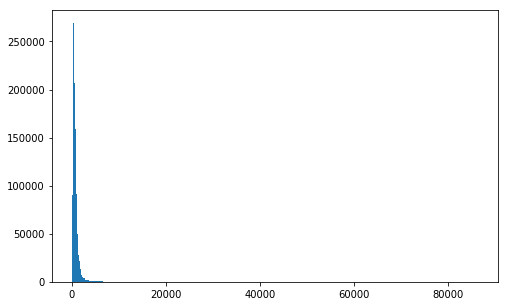

In [166]:
# Explore the duration of trips with a standard-scaled plot
# Define bins by min and max values from the duration_sec and set bin size to 120
dur_sec_bins = np.arange(trips_clean['duration_sec'].min(), trips_clean['duration_sec'].max()+120,120)
# dur_min_bins = np.arange(trips_clean['duration_min'].min(), trips_clean['duration_min'].max()+2, 2)
# dur_hour_bins = np.arange(trips_clean['duration_hour'].min(), trips_clean['duration_hour'].max()+0.1, 0.1)
plt.figure(figsize=[8,5])
plt.hist(data=trips_clean, x='duration_sec', bins=dur_sec_bins)
plt.show()

The above histogram shows the large skew and most data are located before 10000 seconds. Setting scale on x-axis will be done to better show the data distribution.

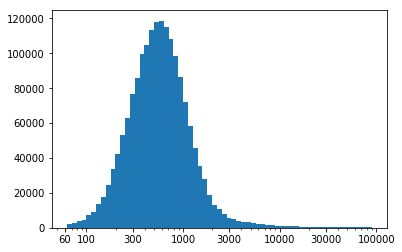

In [169]:
# Define the bins with log transformation
dur_log_bins=10**np.arange(1.8, np.log10(trips_clbean['duration_sec'].max())+0.05, 0.05)
plt.hist(data=trips_clean, x='duration_sec', bins=dur_log_bins)
plt.xscale('log')
# Set the x ticks and ticks' labels
dur_log_ticks = [60, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(dur_log_ticks, dur_log_ticks)
plt.show()

In [209]:
def sec_to_hour(x, inverse=False):
    if not inverse:
        return x/3600.0
    else:
        return x*3600

In [168]:
trips_clean['duration_sec'].describe()

count    1.732358e+06
mean     8.638863e+02
std      2.410906e+03
min      6.100000e+01
25%      3.510000e+02
50%      5.570000e+02
75%      8.740000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

From above graph and statistic data, most of the trips continued from 60 to 10000 seconds, or 1 to 167 minutes. But there have some trips that continued more than 10000 seconds and they need a further investigate.

In [172]:
print(trips_clean.query('duration_sec>=10000 & duration_sec<20000').count()[0])
print(trips_clean.query('duration_sec>=20000 & duration_sec<30000').count()[0])
print(trips_clean.query('duration_sec>=30000 & duration_sec<40000').count()[0])
print(trips_clean.query('duration_sec>=40000 & duration_sec<50000').count()[0])
print(trips_clean.query('duration_sec>=50000').count()[0])

4949
1225
582
447
1369


In [179]:
trips.query('duration_sec>=30000').count()[0]

2399

Text(0,0.5,'Trip Number')

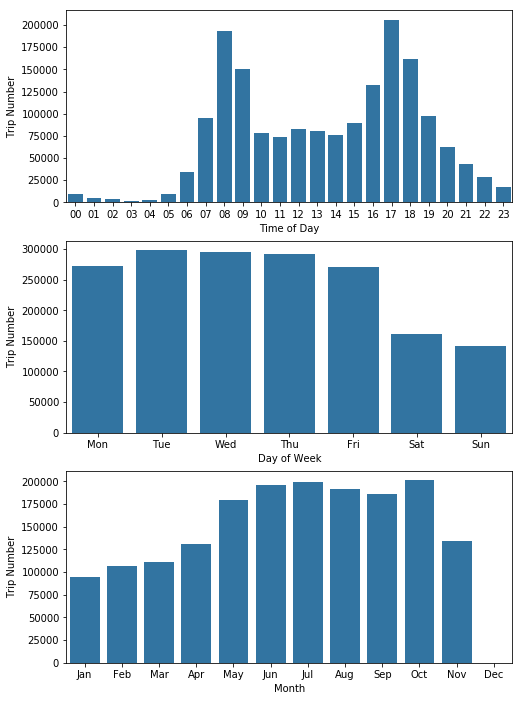

In [261]:
# Define the base color
base_color = sb.color_palette()[0]
# Explore the trip counts by part of day
plt.figure(figsize=[8,12])
plt.subplot(3, 1, 1)
sb.countplot(data=trips_clean,x='start_hour',color=base_color)
plt.xlabel('Time of Day')
plt.ylabel('Trip Number')

# Explore the trip counts by day of week
plt.subplot(3, 1, 2)
sb.countplot(data=trips_clean,x='start_day_of_week',color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Trip Number')

# Explore the trip counts by month of year
plt.subplot(3, 1, 3)
sb.countplot(data=trips_clean,x='start_month',color=base_color)
plt.xlabel('Month')
plt.ylabel('Trip Number')

From above graphs we can get: 
Most trips are taken from 6AM to 10PM.  
Most trips are taken on workdays(Mon-Fri). Less trips are taken on the weekends may because people have reset on weekends.  
The bike sharing is active from May to October. That can be as the results of whether as those months have warm whether.

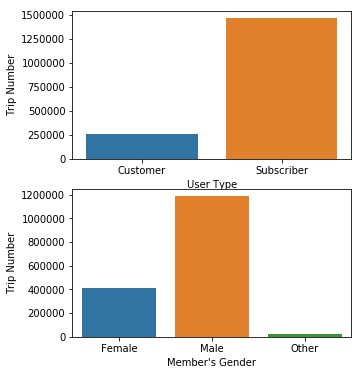

In [175]:
# Explore the trip counts by user type 
plt.figure(figsize=[5, 6])
plt.subplot(2, 1, 1)
sb.countplot(data=trips_clean, x='user_type')
plt.xlabel('User Type')
plt.ylabel('Trip Number')

# Explore the trip counts by member's gender
plt.subplot(2, 1, 2)
sb.countplot(data=trips_clean, x='member_gender')
plt.xlabel("Member's Gender")
plt.ylabel('Trip Number')
plt.show()

The above plot shows that the member(Subscriber) of this system have a absolute number advantages compared with unrgistered user.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text xticklabel objects>)

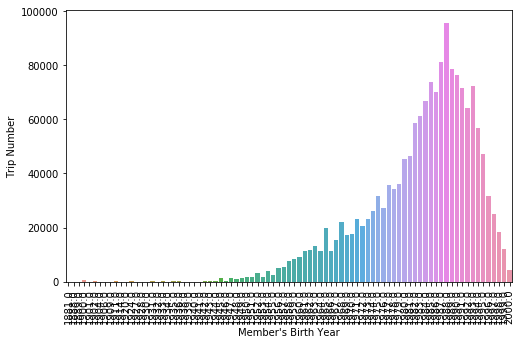

In [51]:
plt.figure(figsize=[8,5])
sb.countplot(data=trips_clean, x='member_birth_year')
plt.xlabel("Member's Birth Year")
plt.ylabel('Trip Number')
plt.xticks(label=['{:.0f}'.format(v) for v in trips['member_birth_year'].value_counts().index.tolist()], rotation=90)

The above plot shows that the male members have a absolute advantages on usages of this system compared with female and other members.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration_sec variable have some records that are more than 10000 seconds(2.7 hours). New column is added to calculate the true duration and check the distribution again.

The duaration distribution is limited in a large range, so a log transform is introduced to generate the histogram. After the transformation, the duration is likely follow a normal distribution.

Other categorical variables (part_of_day, day_of_week, month, user_type and gender) count plot are also explored to show relationship between trips number and each variable.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Following tidiness operations are done:
* Convert the start_time and end_time to datetime type in order to get other (part_of_day, day_of_week, month) information.
* Convert the user_type and member_gender to categorical type.
* Convert the id columns (bike_id, start_station_id, end_station_id) to string type.
* Add new column 'calc_dur_sec' to compute the true time duration in seconds.
* Add new columns 'start_part_of_day', 'end_part_of_day' to get the corresponding part of day (e.g. Morning, Afternoon, Evening and Night) and set the valuse as the ordial data type.
* Add new columns 'start_day_of_week', 'end_day_of_week' to get the corresponding day of week (e.g. Mon - Sun) and set the valuse as the ordial data type.
* Add new columns 'start_month', 'end_month' to get the corresponding month of trips and set the valuse as the ordial data type.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

part_of_day, duration
day_of_week, duration
month, duration

user_type, duration
gender, duration

part_of_day, user_type
day_of_week, user_type
month, user_type

part_of_day, gender
day_of_week, gender
month, gender

In [190]:
trips_clean.duration_sec.describe()

count    1.732358e+06
mean     8.638863e+02
std      2.410906e+03
min      6.100000e+01
25%      3.510000e+02
50%      5.570000e+02
75%      8.740000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

The relationship between duration and time variables(Part of Day, Day of Week, Month of Year)

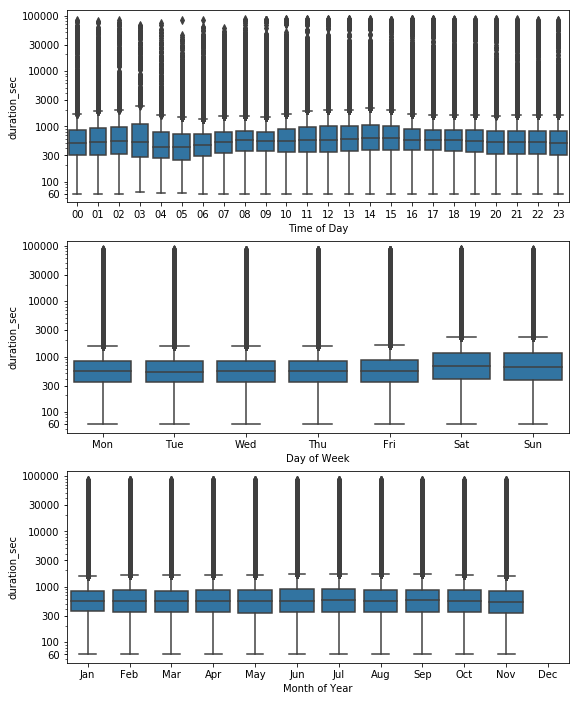

In [262]:
plt.figure(figsize=[9,12])
# Explore the part of day and the duration
plt.subplot(3,1,1)
sb.boxplot(data=trips_clean, x='start_hour', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks(dur_log_ticks,dur_log_ticks)
plt.xlabel('Time of Day')
# Explore the day of week and the duration
plt.subplot(3,1,2)
sb.boxplot(data=trips_clean, x='start_day_of_week', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks(dur_log_ticks,dur_log_ticks)
plt.xlabel('Day of Week')
# Explore the month of year and the duration
plt.subplot(3,1,3)
sb.boxplot(data=trips_clean, x='start_month', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks(dur_log_ticks,dur_log_ticks)
plt.xlabel('Month of Year')

plt.show()

The relationship between duration and user_type and gender

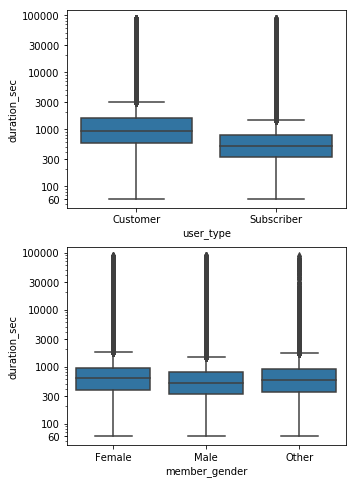

In [227]:
plt.figure(figsize=[5,8])
# Explore the user type and the duration
plt.subplot(2,1,1)
sb.boxplot(data=trips_clean, x='user_type', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks(dur_log_ticks,dur_log_ticks)
# Explore the member gender and the duration
plt.subplot(2,1,2)
sb.boxplot(data=trips_clean, x='member_gender', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks(dur_log_ticks,dur_log_ticks)
plt.show()

Explore the trip number taken by different time sections(part_of_day, day_of_week, month) for different user types.

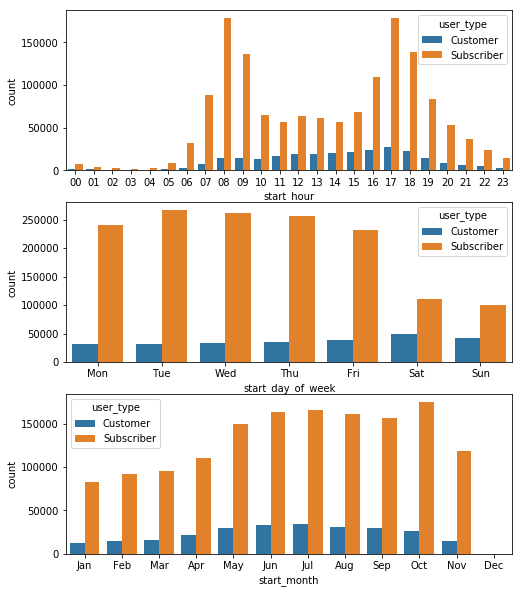

In [263]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
ax = sb.countplot(data=trips_clean, x='start_hour', hue='user_type')
plt.subplot(3,1,2)
ax = sb.countplot(data=trips_clean, x='start_day_of_week', hue='user_type')
plt.subplot(3,1,3)
ax = sb.countplot(data=trips_clean, x='start_month', hue='user_type')


Explore the trip number taken by different time sections(part_of_day, day_of_week, month) for different member genders.

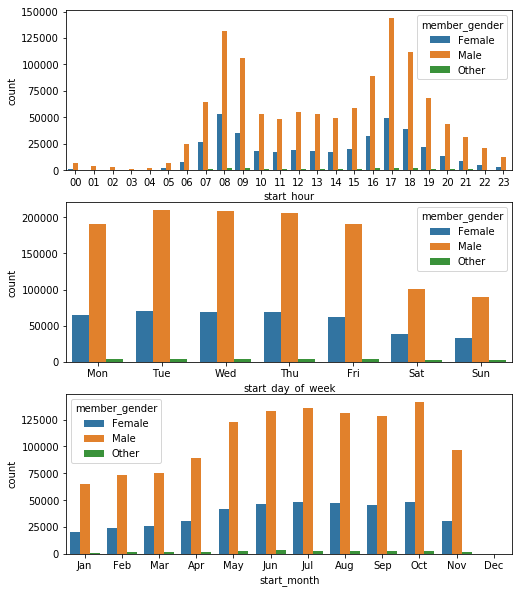

In [264]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
ax = sb.countplot(data=trips_clean, x='start_hour', hue='member_gender')
plt.subplot(3,1,2)
ax = sb.countplot(data=trips_clean, x='start_day_of_week', hue='member_gender')
plt.subplot(3,1,3)
ax = sb.countplot(data=trips_clean, x='start_month', hue='member_gender')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the graphs about relationship between duration and each temporal categorical variables (time of day, day of week, month of year), we can have the consulsions:
* The longest mean duration is happened on 2PM and 3PM.
* The mean durations at the weekends are the longest compared to other weekdays. Seem that people would like to spend more time on weekends.
* The September has the longest mean duration, which is consistence with the univarable exploration.

From the graphs about relationship between duration and user types and gender:
* The Customer(Casual) have a longer mean trip duration than Subscriber(Member).
* The female have the longest mean trip duration compared to male and other.

From the graphs that dipect raltionship between the temporal categorical variables (tim of day, day of week, month of year) and user types, conclusiona are shown below:
* Most trips are taken in the 8AM-9AM and 5PM-6PM for the subscriber. And for customer, most trips are taken around 5PM.
* For subscriber, more trips are taken at the weekdays, while there are more trips at the weekends for customer user.
* For subscriber, more trips are taken on October, while July is the month that has more trips for customer.

From the graphs about relationship between trips numbers and genders, they are consistence with the above conclusion without much difference on gender.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!